# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
app_train.select_dtypes('int')

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,-9327,-236,-1982,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,-20775,365243,-4090,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,-14966,-7921,-5150,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,-11961,-4786,-931,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
float_data = app_train.select_dtypes('float64')
float_data = float_data.copy()

In [7]:
# before transformation np.log1p
print(float_data['AMT_INCOME_TOTAL'].max())
print(float_data['AMT_INCOME_TOTAL'].min())
print(float_data['AMT_INCOME_TOTAL'].mean())
print(float_data['AMT_INCOME_TOTAL'].std())

117000000.0
25650.0
168797.9192969845
237123.14627885626


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1147d6dd0>]],
      dtype=object)

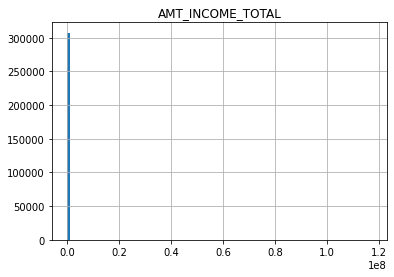

In [8]:
# plot hist before transformation
float_data.hist(column='AMT_INCOME_TOTAL', bins=100)

In [9]:
#对偏度比较大的数据用log1p函数进行转化，使其更加服从高斯分布
float_data['AMT_INCOME_TOTAL'] = np.log1p(float_data['AMT_INCOME_TOTAL']) 

In [10]:
# after transformation np.log1p
print(float_data['AMT_INCOME_TOTAL'].max())
print(float_data['AMT_INCOME_TOTAL'].min())
print(float_data['AMT_INCOME_TOTAL'].mean())
print(float_data['AMT_INCOME_TOTAL'].std())

18.57768450130904
10.152337836193743
11.909245341906919
0.4889064605727765


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153a8990>]],
      dtype=object)

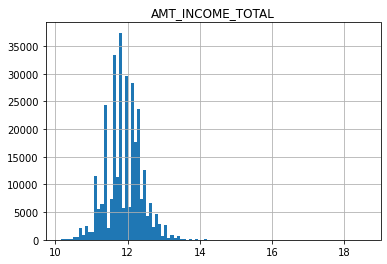

In [11]:
# plot hist after transformation
float_data.hist('AMT_INCOME_TOTAL', bins=100)

In [12]:
# transform it back to original
print(np.expm1(float_data['AMT_INCOME_TOTAL'].max()))
print(np.expm1(float_data['AMT_INCOME_TOTAL'].min()))
print(np.expm1(float_data['AMT_INCOME_TOTAL'].mean()))
print(np.expm1(float_data['AMT_INCOME_TOTAL'].std()))

117000000.00000016
25649.99999999999
148633.4688903123
0.6305321934406103


In [13]:
'''
Try another set of data: AMT_CREDIT.
'''

'\nTry another set of data: AMT_CREDIT.\n'

In [14]:
# before transformation
print(float_data['AMT_CREDIT'].max())
print(float_data['AMT_CREDIT'].min())
print(float_data['AMT_CREDIT'].mean())
print(float_data['AMT_CREDIT'].std())

4050000.0
45000.0
599025.9997057016
402490.77699585486


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1187794d0>]],
      dtype=object)

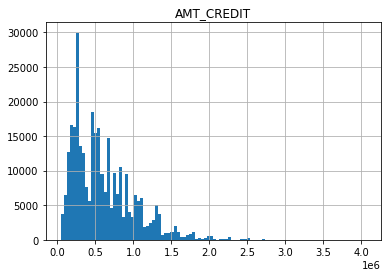

In [15]:
# plot hist before transformation
float_data.hist(column='AMT_CREDIT', bins=100)

In [16]:
#对偏度比较大的数据用log1p函数进行转化，使其更加服从高斯分布
float_data['AMT_CREDIT'] = np.log1p(float_data['AMT_CREDIT']) 

In [17]:
# after transformation
print(float_data['AMT_CREDIT'].max())
print(float_data['AMT_CREDIT'].min())
print(float_data['AMT_CREDIT'].mean())
print(float_data['AMT_CREDIT'].std())

15.214227685996272
10.714439990727769
13.070108059483369
0.7151933587155831


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115c7d990>]],
      dtype=object)

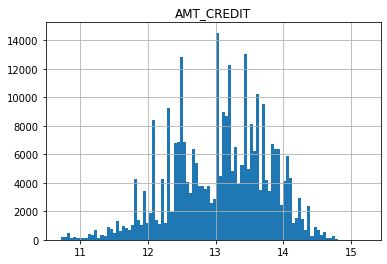

In [18]:
# plot hist after transformation
float_data.hist(column='AMT_CREDIT', bins=100)

In [19]:
# transform it back to original
print(np.expm1(float_data['AMT_CREDIT'].max()))
print(np.expm1(float_data['AMT_CREDIT'].min()))
print(np.expm1(float_data['AMT_CREDIT'].mean()))
print(np.expm1(float_data['AMT_CREDIT'].std()))

4050000.0000000033
44999.999999999985
474542.2585548657
1.0445819817859232
